In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(diabetes.data)

df['T'] = pd.DataFrame(diabetes.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,T
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df.drop('T', axis=1,errors='ignore'))

scaled_df = pd.DataFrame(scaled_df) 


### PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:

pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data)

pca_df

,0,1
0,0.587199,-1.946832
1,-2.831625,1.372082
2,0.272129,-1.634901
3,0.049281,0.382278
4,-0.756421,0.811960
...,...,...
437,1.239525,-1.035968
438,1.264719,0.761319
439,-0.205206,-1.205487
440,0.692871,0.210127


In [7]:
pca_df['T'] = df['T']

pca_df.head()

,0,1,T
0,0.587199,-1.946832,151.0
1,-2.831625,1.372082,75.0
2,0.272129,-1.634901,141.0
3,0.049281,0.382278,206.0
4,-0.756421,0.811960,135.0


# KNN

In [13]:
X = pca_df.drop('T',axis=1)
y = pca_df['T']

y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: T, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

y_test

153     71.0
410    209.0
255    153.0
82      52.0
292     84.0
       ...  
238    257.0
252     91.0
373    168.0
333    164.0
21      49.0
Name: T, Length: 111, dtype: float64

### KNN

In [36]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)

KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
y_pred = KNN.predict(X_test)
y_pred

array([210.        , 172.66666667, 106.66666667, 109.66666667,
        96.33333333, 112.33333333, 151.33333333, 100.        ,
       118.        ,  79.33333333, 162.66666667, 228.66666667,
        89.        , 165.33333333, 175.        , 103.33333333,
       125.66666667, 123.33333333, 110.        , 112.33333333,
       122.33333333, 139.66666667, 169.66666667, 151.33333333,
        96.33333333,  76.66666667,  61.33333333, 126.66666667,
       117.33333333, 212.33333333, 116.66666667, 280.66666667,
       203.        , 203.66666667,  79.        , 143.66666667,
       156.66666667, 275.33333333, 249.        ,  95.33333333,
        66.66666667, 139.33333333, 149.33333333, 166.66666667,
       177.        ,  86.        , 145.66666667,  60.66666667,
        80.66666667, 304.33333333, 205.66666667, 157.33333333,
       146.66666667, 172.        , 239.33333333, 247.66666667,
       208.66666667, 140.66666667, 124.33333333, 163.33333333,
        78.        , 229.        , 179.33333333, 163.33

In [38]:
y_test

153     71.0
410    209.0
255    153.0
82      52.0
292     84.0
       ...  
238    257.0
252     91.0
373    168.0
333    164.0
21      49.0
Name: T, Length: 111, dtype: float64

In [39]:
KNN.score(X_test,y_test)

0.0004177562804353885

In [ ]:
from sklearn.metrics import r2_score
print("R² score:", r2_score(y_test, y_pred))

R² score: 0.0004177562804353885


In [42]:
import matplotlib.pyplot as plt

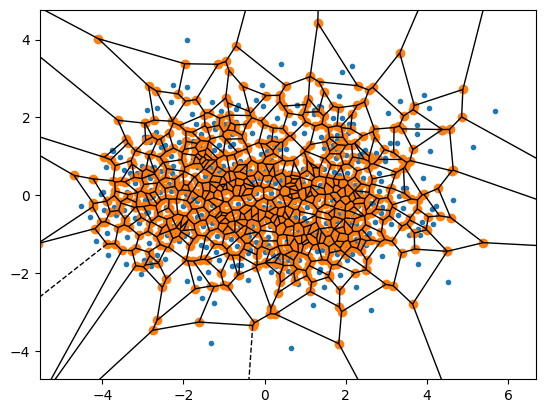

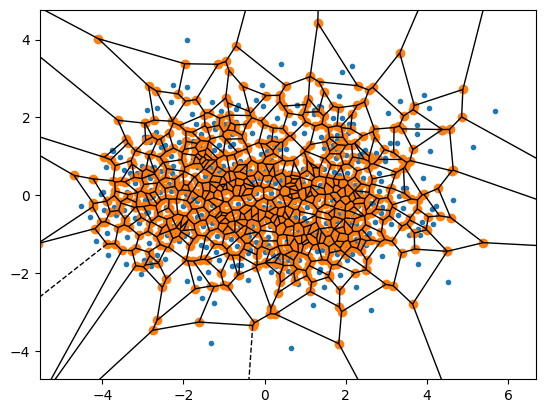

In [56]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(X)
voronoi_plot_2d(vor)


In [57]:
import scipy.cluster
dir(scipy.cluster)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_hierarchy',
 '_optimal_leaf_ordering',
 '_vq',
 'hierarchy',
 'test',
 'vq']

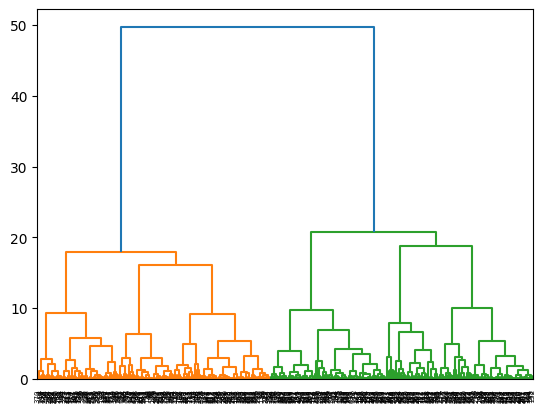

In [54]:
import scipy.cluster.hierarchy as shc

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))